# Python packages for chemioinformatics

In this module we will explore the following packages that might be useful for our data science exercises:
* RDKIT
* Matplotlib
* Pandas

## RDKIT

RDKIT allows us to work with molecules. Amongst other things, you can use it to calculate descriptors and physicochemical properties, draw molecules, substructure search etc

In [1]:
# we first need to import the package
import rdkit

In [3]:
# We will start by learning the functions of the Chem class
from rdkit import Chem

smiles = "CC1CCC2C(C(=O)OC3C24C1CCC(O3)(OO4)C)C"

#we always need to convert the compounds into Rdkit molecules to work with them, as follows:
molecule = Chem.MolFromSmiles(smiles)

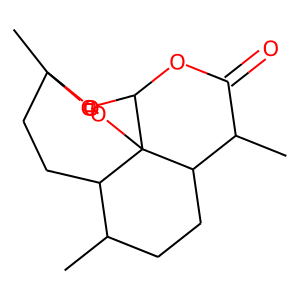

In [5]:
# the RDKIT molecule allows us to visualise it
Chem.Draw.MolToImage(molecule)

In [8]:
# and to calculate properties, like molecular weight or logP
from rdkit.Chem import Descriptors

mw = Descriptors.MolWt(molecule)
logP = Descriptors.MolLogP(molecule)
num_atoms = Descriptors.HeavyAtomCount(molecule)
num_rings = Descriptors.RingCount(molecule)
num_rotatable_bonds = Descriptors.NumRotatableBonds(molecule)

# Print the calculated descriptors
print("Molecular Weight:", mw)
print("LogP (partition coefficient):", logP)
print("Number of Heavy Atoms:", num_atoms)
print("Number of Rings:", num_rings)
print("Number of Rotatable Bonds:", num_rotatable_bonds)

Molecular Weight: 282.33599999999996
LogP (partition coefficient): 2.3949000000000007
Number of Heavy Atoms: 20
Number of Rings: 5
Number of Rotatable Bonds: 0


In [11]:
# we can also use it to directly obtain a fingerprint that represents the molecule
from rdkit.Chem import AllChem
fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius=3)
fingerprint_binary = fingerprint.ToBitString()
fingerprint_binary

'000000000000000000000000000000000000001000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000001000000000000000100000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000010000000000000000001000000000000000000000000000001000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000100000000000000000000000000000000000000000000000000100000000000000000100000000010000000000000000000000100000000010000000000000000001000000000000000000000000000001000100000000000000010000100000000000001000001000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000001000000000000000000101000000000000000100000000000000000000000000000000000000000001000000000000001000000000000000000000000000000000000000000000000000000000

## Matplotlib

Matplotlib is the standard package for making graphs, it allows researchers to quickly plot and analyse their data.

In [12]:
#we first need to import the package

import matplotlib.pyplot as plt

In [13]:
# Let's create a basic dataset to plot, comprised of two lists, x and y
x = [1,2,3,4,5,6,7,8,9]
y = [num**2 for num in x]
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 4, 9, 16, 25, 36, 49, 64, 81]


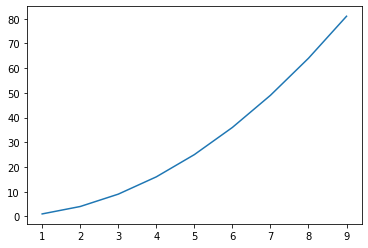

In [14]:
#The plot function takes as input an x and y and gets as output a line graph
plt.plot(x,y)

Text(0.5, 1.0, 'X vs Y')

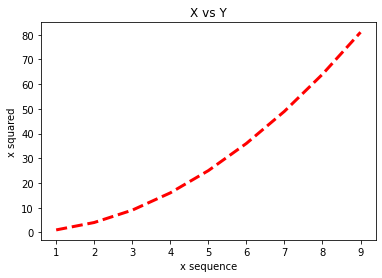

In [15]:
#there are tons of customization options, we won't go over all of them but feel free to explore:

plt.plot(x,y, color = "red", lw = 3, ls = "--")
plt.xlabel("x sequence")
plt.ylabel("x squared")
plt.title("X vs Y")

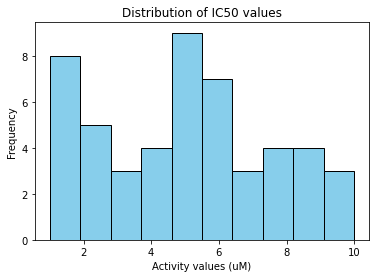

In [20]:
# perhaps one of the most useful to plot activity data is a histogram

activity_values = [5, 6, 5, 3, 6, 3, 1, 10, 5, 1, 4, 1, 6, 2, 2, 9, 8, 2, 1, 10, 6, 3, 4, 1, 9, 7, 8, 7, 9, 2, 5, 1, 5, 6, 6, 8, 8, 7, 4, 5, 1, 5, 4, 6, 2, 5, 5, 10, 9, 1]

plt.hist(activity_values, bins=10, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed

plt.xlabel('Activity values (uM)')
plt.ylabel('Frequency')
plt.title('Distribution of IC50 values')

plt.show()

## Pandas

Pandas allows us to open and work with tabular data (for example, csv files)

In [21]:
import pandas as pd #we typically use abbreviations to work with some packages in a faster way. Now, pandas will always be called pd

In [27]:
# we can load a .csv file onto the notebook to work with it
# we use df (abbreviation of dataframe) to name this pandas object
df = pd.read_csv("../data/ic50_example.csv")

#we can observe the first rows of our firl
df.head()

,smiles,activity
0,FC(F)Oc1ccc(-c2nnc3cncc(CN4Cc5ccccc5C4)n23)cc1,0.110000
1,Cc1c(Cl)cccc1NC(=O)c1cncc2nnc(-c3ccc(OC(F)F)cc...,4.730333
2,O=C(Nc1cccc(Cl)c1)c1cncc2nnc(-c3ccc(OC(F)F)cc3...,0.211000
3,N#Cc1ccc(-c2nnc3cncc(OCCc4ccccc4Cl)n23)cc1,0.309000
4,Fc1ccc(CCOc2cncc3nnc(-c4ccc(C(F)(F)F)nc4)n23)cc1F,0.391550


In [30]:
# we can observe the shape of the dataframe
df.shape

(415, 2)

In [29]:
#we can see how many values are below 1 uM
len(df[df["activity"]<1])

124

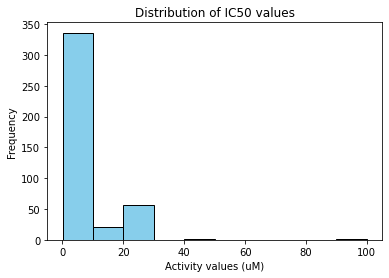

In [31]:
# finally, we can plot the IC50 distribution to easily analyse our data
ic50_vals = df["activity"].tolist()

plt.hist(ic50_vals, bins=10, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed

plt.xlabel('Activity values (uM)')
plt.ylabel('Frequency')
plt.title('Distribution of IC50 values')

plt.show()

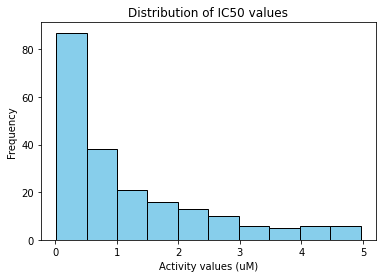

In [32]:
#maybe we want to see the distribution of only the smaller values to have more precision
df2 =  df[df["activity"]<5]
ic50_vals = df2["activity"].tolist()

plt.hist(ic50_vals, bins=10, color='skyblue', edgecolor='black')  # Adjust bins and colors as needed

plt.xlabel('Activity values (uM)')
plt.ylabel('Frequency')
plt.title('Distribution of IC50 values')

plt.show()